In [ ]:
import matplotlib.pyplot as plt

from turtle import forward
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(len(x_train))
print(len(x_test))

120
30


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
class IrisData(Dataset):
    def __init__(self, x_train, y_train):
        super().__init__()
        self.x, self.y = torch.from_numpy(x_train), torch.from_numpy(y_train)
        self.n = len(self.x)

    def __len__(self):
        return self.n
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
iris_data = IrisData(x_train, y_train)
train_loader = DataLoader(iris_data, batch_size=32, shuffle=True)

print(iris_data.x.shape)
print(iris_data.y.shape)




torch.Size([120, 4])
torch.Size([120])


In [23]:
class MultiClassNet(nn.Module):
    def __init__(self, input_size, output_size, hidden_features):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_features),
            nn.Sigmoid(),
            nn.Linear(hidden_features, output_size)
        )
        self.log_softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.layers(x)
        return self.log_softmax(x)
    
N_classes = len(iris_data.y.unique())
N_features = iris_data.x.shape[1]
HIDDEN = 6

model = MultiClassNet(N_features, N_classes, HIDDEN)
criterion = nn.CrossEntropyLoss()
LR = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=LR)


tensor(0.9277, grad_fn=<NllLossBackward0>)
tensor(0.9444, grad_fn=<NllLossBackward0>)
tensor(0.9595, grad_fn=<NllLossBackward0>)
tensor(0.9281, grad_fn=<NllLossBackward0>)
tensor(0.9672, grad_fn=<NllLossBackward0>)
tensor(0.9596, grad_fn=<NllLossBackward0>)
tensor(0.9164, grad_fn=<NllLossBackward0>)
tensor(0.9511, grad_fn=<NllLossBackward0>)
tensor(0.9385, grad_fn=<NllLossBackward0>)
tensor(0.9577, grad_fn=<NllLossBackward0>)
tensor(0.9019, grad_fn=<NllLossBackward0>)
tensor(0.9462, grad_fn=<NllLossBackward0>)
tensor(0.9757, grad_fn=<NllLossBackward0>)
tensor(0.9782, grad_fn=<NllLossBackward0>)
tensor(0.9345, grad_fn=<NllLossBackward0>)
tensor(0.8881, grad_fn=<NllLossBackward0>)
tensor(0.9159, grad_fn=<NllLossBackward0>)
tensor(0.9199, grad_fn=<NllLossBackward0>)
tensor(0.9060, grad_fn=<NllLossBackward0>)
tensor(0.9223, grad_fn=<NllLossBackward0>)
tensor(0.9223, grad_fn=<NllLossBackward0>)
tensor(0.9225, grad_fn=<NllLossBackward0>)
tensor(0.9285, grad_fn=<NllLossBackward0>)
tensor(0.92

<Axes: >

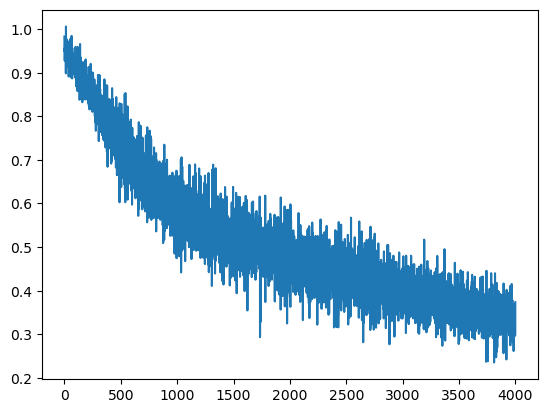

In [37]:
losses = []
for epoch in range(1000):
    for batch_x, y in train_loader:
        optimizer.zero_grad()

        y_pred = model(batch_x)
        loss = criterion(y_pred, y)
        losses.append(loss.item())
        loss.backward()

        optimizer.step()
    print(loss)
sns.lineplot(x=range(len(losses)), y=losses)


In [41]:
y

tensor([2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0])

In [44]:
torch.max(y_pred.data, 1)

torch.return_types.max(
values=tensor([-0.5789, -0.3083, -0.4371, -0.0593, -0.4620, -0.4228, -0.4408, -0.0574,
        -0.0842, -0.5122, -0.6483, -0.4451, -0.3821, -0.0736, -0.4697, -0.5726,
        -0.4675, -0.5785, -0.0499, -0.0532, -0.0863, -0.6528, -0.4803, -0.0700]),
indices=tensor([2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0]))

In [48]:
X_test_torch = torch.from_numpy(x_test)
y_test_torch = torch.from_numpy(y_test)

with torch.no_grad():
    y_test_log = model(X_test_torch)
    y_test_pred = torch.max(y_test_log.data, 1)
    


In [50]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_test_pred.indices)

0.9333333333333333

In [56]:
from collections import Counter

cnt_y = Counter(y_test)
cnt_pred = cnt_y.most_common()[0][1]
cnt_pred/len(y_test)

0.43333333333333335